In [1]:
import os
import cv2
import random
import numpy as np
from sklearn.metrics import accuracy_score,jaccard_score,f1_score
import matplotlib.pyplot as plt

In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
def white_presence(arr):
    r, c = np.shape(arr)
    flag = 0
    for i in range(0,r):
        for j in range(0,c):
            if arr[i][j]==1:
                flag = 1
            break
    return flag

In [259]:
actual = cv2.imread(r".\current\im7.jpg",0)
predicted = cv2.imread(r".\current\pred7c.jpg",0)

In [260]:
np.shape(actual)

(448, 448)

In [261]:
def white_presence(arr):
    r, c = np.shape(arr)
    flag = 0
    for i in range(0,r):
        for j in range(0,c):
            if arr[i][j]==1:
                flag = 1
                break
    return flag

In [262]:
def region_f1(actual,predicted):
    n_split = 8
    n, p = np.shape(actual)
    row = np.linspace(0,n,num = n_split,endpoint=False, dtype=int)
    column = np.linspace(0,n,num = n_split,endpoint=False, dtype = int)
    row = np.append(row,n)
    column = np.append(column,n)

    pooled_actual = np.zeros([n_split,n_split])
    pooled_predicted = np.zeros([n_split,n_split])
    for i in range(0,n_split):
        for j in range(0,n_split):
            sub_actual = actual[row[i]:row[i+1],column[j]:column[j+1]]
            sub_predicted = predicted[row[i]:row[i+1],column[j]:column[j+1]]
            a = white_presence(sub_actual)
            b = white_presence(sub_predicted)
            
            if a==1 :
                pooled_actual[i][j] = 1
            else:
                pooled_actual[i][j] = 0

            if b==1:
                pooled_predicted[i][j] = 1
            else:
                pooled_predicted[i][j] = 0
              
    f1 = f1_score(pooled_actual.flatten(), pooled_predicted.flatten(), zero_division=1)
    return f1

In [263]:
from sklearn.mixture import GaussianMixture

def gaussian(actual,predicted):

    coords = np.nonzero(actual)
    coords_actual = [(x,y) for (x,y) in zip(coords[0],coords[1])]

    gm  =  GaussianMixture(n_components=5, random_state=0).fit(coords_actual)

    score_actual = np.mean(np.abs(gm.score_samples(coords_actual)))

    coords = np.nonzero(predicted)
    coords_predicted = [(x,y) for (x,y) in zip(coords[0],coords[1])]
    score_predicted = np.mean(np.abs(gm.score_samples(coords_predicted)))

    return score_actual/score_predicted

In [264]:
actual = actual/255
predicted = predicted/255

In [265]:
for i in range(0,448):
      for j in range(0,448):
        if actual[i][j]>=0.5:
            actual[i][j] = 1
        else:
            actual[i][j] = 0

for i in range(0,448):
      for j in range(0,448):
        if predicted[i][j]>=0.5:
            predicted[i][j] = 1
        else:
            predicted[i][j] = 0

In [266]:
def averagejaccard(actual,predicted):
    jac = jaccard_score(actual.flatten(), predicted.flatten())
    jac_negative = jaccard_score(actual.flatten(), predicted.flatten(), pos_label = 0)
    if jac==0:
        av = jac_negative
    elif jac_negative==0:
        av = jac
    else:
        av = (jac+jac_negative)/2
    return av

In [267]:
def averagef1(actual,predicted):
    f1 = f1_score(actual.flatten(), predicted.flatten(), zero_division=0)
    f1_negative = f1_score(actual.flatten(), predicted.flatten(), pos_label = 0, zero_division=0)
    if f1==0:
        av = f1_negative
    elif f1_negative==0:
        av = f1
    else:
        av = (f1+f1_negative)/2
    return av

In [268]:
iou = accuracy_score(actual.flatten(),predicted.flatten())
f1 = f1_score(actual.flatten(),predicted.flatten())
jac = jaccard_score(actual.flatten(),predicted.flatten())
region = region_f1(actual,predicted)
#gauss = gaussian(actual,predicted)
f1mean = averagef1(actual,predicted)
jacmean = averagejaccard(actual,predicted)

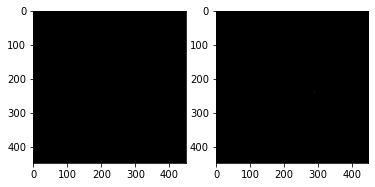

In [269]:
f, axs = plt.subplots(1,2)
axs[0].imshow(actual,cmap='gray')
axs[1].imshow(predicted,cmap='gray')

In [270]:
print('Iou is:',iou)
print('F1 is:',f1)
print('Jaccard Score is:',jac)
print('Region-F1 Score is:',region)
#print('Gaussian is:',gauss)
print('Average F1 is:',f1mean)
print('Average Jaccard is:',jacmean)

Iou is: 0.9999950175382653
F1 is: 0.0
Jaccard Score is: 0.0
Region-F1 Score is: 0.0
Average F1 is: 0.9999975087629264
Average Jaccard is: 0.9999950175382653
